In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
!pip install yahoo_fin
from yahoo_fin import options
from datetime import datetime
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from tensorflow.keras import optimizers
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.stats import uniform, truncnorm, randint
from keras.wrappers.scikit_learn import KerasRegressor

style.use("ggplot")

#chain = options.get_options_chain("TSLA", '03/20/2020')

#data = pd.DataFrame(chain['calls'])
#data1 = pd.DataFrame(chain['puts'])
#maturities = data.iloc[:, 1]
#strike = data.iloc[:,2]
#volatilities = data.iloc[:,10]

dataset = pd.read_csv('allCalls.csv') #Importing data from local file
dataset = dataset.loc[dataset['Implied Volatility'] != 0]
maturities = dataset['Maturity']
strikes = dataset['Strike']
volatilities = dataset["Implied Volatility"]

In [0]:
maturities = maturities.to_numpy()
strikes = strikes.to_numpy()
volatilities = volatilities.to_numpy()



In [5]:
volatilities

array([307.3 , 304.86, 299.22, ...,  54.99,  55.23,  56.12])

In [6]:
inputs = []
for i in range(maturities.size):
    inputs.append([maturities[i],strikes[i]])
inputs

[[10, 320.0],
 [10, 325.0],
 [10, 330.0],
 [10, 335.0],
 [10, 340.0],
 [10, 345.0],
 [10, 350.0],
 [10, 355.0],
 [10, 370.0],
 [10, 375.0],
 [10, 380.0],
 [10, 385.0],
 [10, 390.0],
 [10, 395.0],
 [10, 400.0],
 [10, 405.0],
 [10, 410.0],
 [10, 415.0],
 [10, 420.0],
 [10, 425.0],
 [10, 430.0],
 [10, 435.0],
 [10, 440.0],
 [10, 445.0],
 [10, 450.0],
 [10, 455.0],
 [10, 460.0],
 [10, 465.0],
 [10, 470.0],
 [10, 475.0],
 [10, 480.0],
 [10, 485.0],
 [10, 490.0],
 [10, 495.0],
 [10, 500.0],
 [10, 510.0],
 [10, 520.0],
 [10, 530.0],
 [10, 540.0],
 [10, 542.5],
 [10, 545.0],
 [10, 547.5],
 [10, 550.0],
 [10, 552.5],
 [10, 555.0],
 [10, 557.5],
 [10, 560.0],
 [10, 562.5],
 [10, 565.0],
 [10, 567.5],
 [10, 570.0],
 [10, 572.5],
 [10, 575.0],
 [10, 577.5],
 [10, 580.0],
 [10, 582.5],
 [10, 585.0],
 [10, 587.5],
 [10, 590.0],
 [10, 592.5],
 [10, 595.0],
 [10, 597.5],
 [10, 600.0],
 [10, 602.5],
 [10, 605.0],
 [10, 607.5],
 [10, 610.0],
 [10, 612.5],
 [10, 615.0],
 [10, 617.5],
 [10, 620.0],
 [10, 

Text(0.5, 0, 'Volatility')

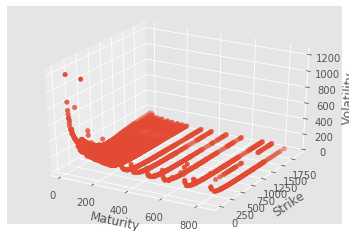

In [7]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(maturities, strikes, volatilities)
threedee.set_xlabel('Maturity')
threedee.set_ylabel('Strike')
threedee.set_zlabel('Volatility')

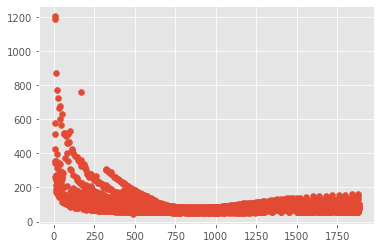

In [8]:
plt.scatter(strikes, volatilities)


In [0]:
inputs1 = inputs
volatilities1 = volatilities

In [0]:
 X_train, X_test, Y_train, Y_test = train_test_split(inputs1, volatilities1, test_size=0.20, random_state=42)

In [59]:
X_train = np.asarray(X_train)
X_train.shape

(2645, 2)

In [60]:
Y_train = np.asarray(Y_train)
Y_train.shape
Y_train

array([125.67,  59.21,  48.38, ...,  79.31,  80.04,  57.12])

In [61]:
Y_test = np.asarray(Y_test)
Y_test.shape

(662,)

In [62]:
X_test = np.asarray(X_test)
X_test.shape

(662, 2)

In [0]:
def create_model(numNeurons = 512, numLayers = 7):
    model = Sequential()
    model.add(layers.Dense(numNeurons, input_dim=2, activation='relu'))

    for i in range(numLayers):
      model.add(layers.Dense(numNeurons, activation='relu'))

    model.add(layers.Dense(1))
    
    # compiling the sequential model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
model = KerasRegressor(build_fn=create_model, epochs = 500)

In [65]:
history = model.fit(X_train, Y_train,
          batch_size=400, epochs=500,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 2645 samples, validate on 662 samples
Epoch 1/500
2645/2645 - 1s - loss: 10048.3419 - val_loss: 8791.0829
Epoch 2/500
2645/2645 - 0s - loss: 8221.5866 - val_loss: 7796.7875
Epoch 3/500
2645/2645 - 0s - loss: 7625.1315 - val_loss: 7549.1831
Epoch 4/500
2645/2645 - 0s - loss: 7490.8889 - val_loss: 7470.5731
Epoch 5/500
2645/2645 - 0s - loss: 7455.0414 - val_loss: 7414.4999
Epoch 6/500
2645/2645 - 0s - loss: 7438.6204 - val_loss: 7392.9147
Epoch 7/500
2645/2645 - 0s - loss: 7455.9111 - val_loss: 7448.0842
Epoch 8/500
2645/2645 - 0s - loss: 7489.3097 - val_loss: 7546.7298
Epoch 9/500
2645/2645 - 0s - loss: 7436.0078 - val_loss: 7323.6501
Epoch 10/500
2645/2645 - 0s - loss: 7379.6689 - val_loss: 7385.8715
Epoch 11/500
2645/2645 - 0s - loss: 7351.7661 - val_loss: 7306.5710
Epoch 12/500
2645/2645 - 0s - loss: 7293.1228 - val_loss: 7293.3001
Epoch 13/500
2645/2645 - 0s - loss: 7266.0321 - val_loss: 7260.9190
Epoch 14/500
2645/2645 - 0s - loss: 7265.8236 - val_loss: 7267.1854
Epoch 15/

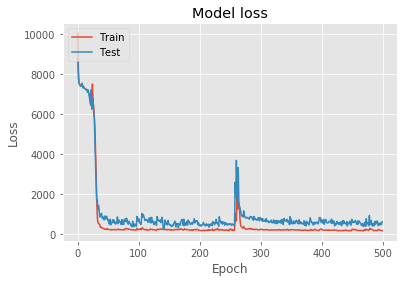

In [66]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
# Attempt at Grid Search

numNeurons = [64,128,256,512]
batch_size = [100,200,300,400]
numLayers = [3,5,7,9]

model_params = {
    'numNeurons': numNeurons, 'batch_size': batch_size, 'numLayers': numLayers
}
inputs = np.asarray(inputs)
model_tuned = GridSearchCV(model, param_grid = model_params, cv = 2, verbose=0, n_jobs = -1, scoring = 'neg_mean_squared_error')
model2 = model_tuned.fit(inputs, volatilities)



/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train on 3307 samples
Epoch 1/500
3307/3307 [==============================] - 1s 239us/sample - loss: 9682.5164
Epoch 2/500
3307/3307 [==============================] - 0s 10us/sample - loss: 7780.8483
Epoch 3/500
3307/3307 [==============================] - 0s 10us/sample - loss: 7633.2475
Epoch 4/500
3307/3307 [==============================] - 0s 14us/sample - loss: 7519.9554
Epoch 5/500
3307/3307 [==============================] - 0s 11us/sample - loss: 7516.3842
Epoch 6/500
3307/3307 [==============================] - 0s 12us/sample - loss: 7448.1952
Epoch 7/500
3307/3307 [==============================] - 0s 12us/sample - loss: 7459.7379
Epoch 8/500
3307/3307 [==============================] - 0s 10us/sample - loss: 7414.4611
Epoch 9/500
3307/3307 [==============================] - 0s 11us/sample - loss: 7381.1138
Epoch 10/500
3307/3307 [==============================] - 0s 10us/sample - loss: 7372.9383
Epoch 11/500
3307/3307 [==============================] - 0s 11us/sample - l

In [56]:
model2.best_score_
model2.best_params_

{'batch_size': 400, 'numLayers': 7, 'numNeurons': 512}

In [0]:
ymin = 10
ymax = 800
yinc = 10

xmin = 350
xmax = 2000
xinc = 25

X = np.arange(xmin, xmax, xinc)
Y = np.arange(ymin, ymax, yinc)

X, Y = np.meshgrid(X, Y)

x = np.ndarray.flatten(X)
y = np.ndarray.flatten(Y)
xtest = np.stack((x, y), axis=-1)

In [68]:
predict = model.predict(xtest)

# pred = np.ndarray.squeeze(predict, axis=1)
pred = np.reshape(predict, (int((ymax-ymin)/yinc),int((xmax-xmin)/xinc)))

print(pred)


[[267.8714   255.43176  247.22563  ... 209.17784  210.13388  211.09201 ]
 [228.77075  221.14839  212.16812  ... 166.48936  167.4349   168.38008 ]
 [225.78444  212.96873  200.35678  ... 147.74342  148.30994  148.88577 ]
 ...
 [ 59.624496  58.761562  57.985497 ...  49.615757  49.82346   50.0304  ]
 [ 59.53607   58.695225  57.911667 ...  49.367397  49.573143  49.78085 ]
 [ 59.453465  58.635372  57.842487 ...  49.109516  49.333412  49.53508 ]]


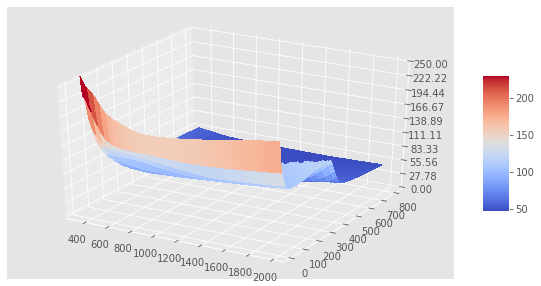

In [69]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.gca(projection='3d')

surf1 = ax1.plot_surface(X, Y, pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax1.set_zlim(0, 250)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf1, shrink=0.5, aspect=5)
